# Import Library

In [ ]:
import pandas as pd  # Import pandas for data manipulation and analysis

from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder for one-hot encoding categorical features
from sklearn.model_selection import train_test_split  # Import train_test_split function

from sklearn.metrics import accuracy_score # Import accuracy_score for accuracy calculation
import matplotlib.pyplot as plt  # Import matplotlib for data visualization
import seaborn as sns  # Import seaborn for statistical data visualization
from sklearn.metrics import confusion_matrix  # Import confusion_matrix for evaluating classification performance
from sklearn.metrics import classification_report  # Import classification_report for detailed classification metrics

from sklearn.naive_bayes import MultinomialNB # Import Multinomial Naive Bayes model

# Load Data

In [ ]:
# Load dataset
df = pd.read_csv("productOnline.csv")
df.sample(5)

,brand,product name,class,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,OS,warranty
365,Honor,MagicBook X14 2023 ?FRI-F56 Laptop,B,12th Gen Intel Core i5 12450H,"Octa Core (4P + 4E), 12 Threads",16GB,DDR4,512GB,SSD,Intel UHD Graphics,14.0,Windows 11 OS,1
838,Xiaomi,Mi Notebook Ultra Laptop,B,11th Gen Intel Core i5 11300H,"Quad Core, 8 Threads",16GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,15.6,Windows 10 OS,1
748,MSI,Thin GF63 11UC-1475IN Gaming Laptop,B,11th Gen Intel Core i5 11260H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB NVIDIA GeForce RTX 3050,15.6,Windows 11 OS,2
238,Asus,ROG Strix G16 2023 G614JU-N3200WS Gaming Laptop,D,13th Gen Intel Core i7 13650HX,14 Cores (6P + 8E),16GB,DDR5,1TB,SSD,6GB NVIDIA GeForce RTX 4050,16.0,Windows 11 OS,2
83,Acer,Predator Helios Neo 16 2023 PHN16-71 Gaming La...,D,13th Gen Intel Core i9 13900HX,"24 Cores (8P + 16E), 32 Threads",16GB,DDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4070,16.0,Windows 11 OS,2


# Preprocessing

In [ ]:
# Show dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         848 non-null    object 
 1   product name  848 non-null    object 
 2   class         848 non-null    object 
 3   processor     848 non-null    object 
 4   CPU           848 non-null    object 
 5   Ram           848 non-null    object 
 6   Ram_type      848 non-null    object 
 7   ROM           848 non-null    object 
 8   ROM_type      848 non-null    object 
 9   GPU           848 non-null    object 
 10  display_size  848 non-null    float64
 11  OS            848 non-null    object 
 12  warranty      848 non-null    int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 86.2+ KB


In [ ]:
# Assume feature and class name
feature_names = df.drop(labels=['class'], axis=1).columns.tolist()
class_names = df['class'].unique().tolist()

# Print the list of feature names
print("Feature Names:")
print(feature_names)

# Print the list of class names
print("\nClass Names:")
print(class_names)

Feature Names:
['brand', 'product name', 'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU', 'display_size', 'OS', 'warranty']

Class Names:
['A', 'B', 'C', 'D']


In [ ]:
# Lower cases data and count possible instances

# Function to lower cases data
def lower_cases_data(df) :
  for i in df.columns :
    if  df.loc[:,i].dtype == 'O':
      df.loc[:,i] = df.loc[:,i].str.lower()

# Function to count possible instances
def count_possible_instances(df) :
  for i in df.columns :
    print(i, ":", df.loc[:,i].value_counts())
    print("-------------------------------------")

# Call lower_cases_data function and count_possible_instances function
lower_cases_data(df)
count_possible_instances(df)

brand : hp           175
lenovo       165
asus         153
dell          98
acer          84
msi           59
samsung       26
infinix       15
apple          9
xiaomi         8
lg             8
gigabyte       8
fujitsu        6
zebronics      4
ultimus        4
tecno          3
wings          3
realme         3
chuwi          3
honor          2
axl            2
microsoft      2
huawei         2
primebook      1
razer          1
ninkear        1
vaio           1
walker         1
avita          1
Name: brand, dtype: int64
-------------------------------------
product name : inspiron 3525 laptop                 4
inspiron 3511 laptop                 4
megabook t1 laptop                   3
vostro 3425 laptop                   3
galaxy book2 15 laptop               3
                                    ..
inspiron 14 5430 2023 laptop         1
inspiron 5425 laptop                 1
inspiron 5518 d560667win9s laptop    1
inspiron 5518 laptop                 1
pro series z zeb-nbc 4s laptop

In [ ]:
# Normalize whitespace
for i in range(len(df.columns)) :
  column_temp = df.iloc[:,i]
  if  column_temp.dtype == 'O' :
    for j in range(len(column_temp)) :
      data_temp = df.iloc[j,i].split()
      df.iloc[j,i] = " ".join(data_temp)

# Call count_possible_instances function to checkup data
count_possible_instances(df)

brand : hp           175
lenovo       165
asus         153
dell          98
acer          84
msi           59
samsung       26
infinix       15
apple          9
xiaomi         8
lg             8
gigabyte       8
fujitsu        6
zebronics      4
ultimus        4
tecno          3
wings          3
realme         3
chuwi          3
honor          2
axl            2
microsoft      2
huawei         2
primebook      1
razer          1
ninkear        1
vaio           1
walker         1
avita          1
Name: brand, dtype: int64
-------------------------------------
product name : inspiron 3525 laptop                 4
inspiron 3511 laptop                 4
megabook t1 laptop                   3
vostro 3425 laptop                   3
galaxy book2 15 laptop               3
                                    ..
inspiron 14 5430 2023 laptop         1
inspiron 5425 laptop                 1
inspiron 5518 d560667win9s laptop    1
inspiron 5518 laptop                 1
pro series z zeb-nbc 4s laptop

In [ ]:
# Create an instance of OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Use OneHotEncoder with categorical data
df_encoded = pd.DataFrame(onehot_encoder.fit_transform(df[feature_names]))

# Create new feature names by combining original feature names with "_" and original data
onehot_columns = onehot_encoder.get_feature_names_out(feature_names)

# Create a DataFrame with the one-hot encoded features and the 'class' column
df_encoded = pd.DataFrame(onehot_encoder.fit_transform(df[feature_names]), columns=onehot_columns)
df_encoded['class'] = df['class']

# Encode string data (Target)
dic = {'a': 0, 'b': 1, 'c' : 2, 'd' : 3}
df_encoded['class'] = df_encoded['class'].map(dic)

# Show a sample of df_encoded
df_encoded.head(5)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,brand_acer,brand_apple,brand_asus,brand_avita,brand_axl,brand_chuwi,brand_dell,brand_fujitsu,brand_gigabyte,brand_honor,...,OS_mac high sierra os,OS_mac os,OS_ubuntu os,OS_windows 10 os,OS_windows 11 os,OS_windows os,warranty_1,warranty_2,warranty_3,class
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


In [ ]:
# Define X and y : X is feature. y is answer lable of X.
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Train Test Split

In [ ]:
# Dividing the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15  , random_state=3750) # 85% training and 15% test

# Multinomial Naive Bayes (Multinomial NB)

In [ ]:
# Create an instance of MultinomialNB
multinomail_nb_model = MultinomialNB()

# Train model
multinomail_nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predict on the test set
y_pred = multinomail_nb_model.predict(X_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8828125


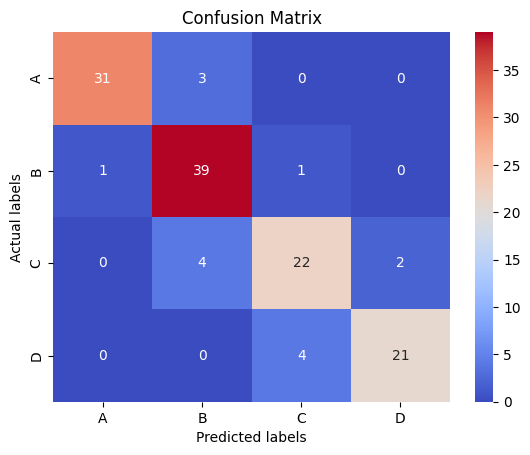

In [ ]:
# Show confusion matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a subplot
ax = plt.subplot()

# Display the confusion matrix as a heatmap with annotations
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm")

# Set the title and axis labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted labels")
ax.set_ylabel("Actual labels")

# Set tick labels for both axes using class names
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

# Show the plot
plt.show()

In [ ]:
# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print(report)

              precision    recall  f1-score   support

           A     0.9688    0.9118    0.9394        34
           B     0.8478    0.9512    0.8966        41
           C     0.8148    0.7857    0.8000        28
           D     0.9130    0.8400    0.8750        25

    accuracy                         0.8828       128
   macro avg     0.8861    0.8722    0.8777       128
weighted avg     0.8855    0.8828    0.8826       128

